In [6]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import keras 

from skimage.transform import resize
from keras.models import load_model

In [21]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data
def check_dicom(filename):     
    print('Load file {} ...'.format(filename))
    ds = pydicom.dcmread(filename)       
    img = ds.pixel_array
    
    return img
    
    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
def preprocess_image(img,img_mean,img_std,img_size): 
    proc_img = resize(img, img_size)
    
    return proc_img

# This function loads in our trained model w/ weights and compiles it 
# def load_model(model_path, weight_path):
#     model = tf.keras.models.load_model(model_path)
    
    
#     return model

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
    score = model.predict(img)
    prediction = score > thresh
    
    print(f"Score: {score} | Threshold: {thresh} | Prediction: {prediction}")
    
    return prediction 

In [18]:
test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

model_path = "val_loss.best.hdf5"
weight_path = None #path to saved best weights
my_model = load_model(model_path) 

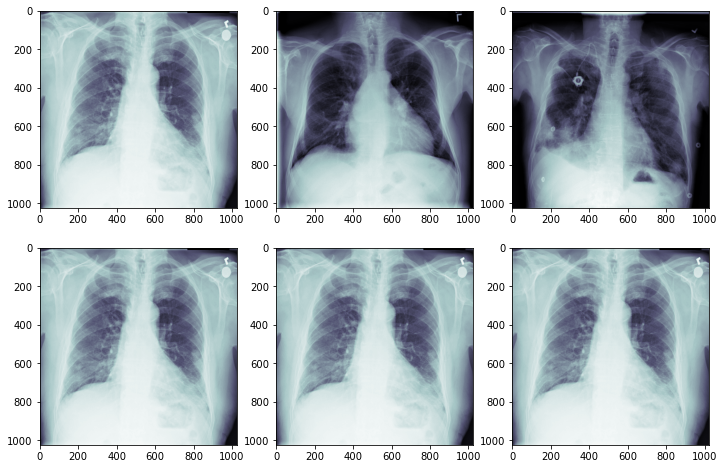

In [29]:
imgs = [pydicom.dcmread(dc).pixel_array for dc in test_dicoms]

plt.figure(figsize=(12, 8))
for i in range(len(imgs)):
    plt.subplot(2, 3, i+1)
    plt.imshow(imgs[i], cmap='bone')


In [30]:
IMG_SIZE=(1, 299, 299, 3) # This might be different if you did not use vgg16
img_mean = None # loads the mean image value they used during training preprocessing
img_std = None # loads the std dev image value they used during training preprocessing
thresh = 0.2

# use the .dcm files to test your prediction
for i in test_dicoms:
    
    img = np.array([])
    img = check_dicom(i)
    
    if img is None:
        continue
        
    img_proc = preprocess_image(img,img_mean,img_std,IMG_SIZE)
    pred = predict_image(my_model,img_proc,thresh)
    print(pred)

Load file test1.dcm ...
Score: [[0.4370998]] | Threshold: 0.2 | Prediction: [[ True]]
[[ True]]
Load file test2.dcm ...
Score: [[0.450539]] | Threshold: 0.2 | Prediction: [[ True]]
[[ True]]
Load file test3.dcm ...
Score: [[0.44653094]] | Threshold: 0.2 | Prediction: [[ True]]
[[ True]]
Load file test4.dcm ...
Score: [[0.4370998]] | Threshold: 0.2 | Prediction: [[ True]]
[[ True]]
Load file test5.dcm ...
Score: [[0.4370998]] | Threshold: 0.2 | Prediction: [[ True]]
[[ True]]
Load file test6.dcm ...
Score: [[0.4370998]] | Threshold: 0.2 | Prediction: [[ True]]
[[ True]]
